# Salary Prediction Portfolio



# Part 1 - Defining the problem that needs to be solved

An organization's ability to maintain a fair and balanced pay structure in line with internal and external (industry) factors is vital for the success of the organization and employee retention KPI.

The goal of this portfolio is predicting salaries for a new set of job posting with reliable accuracy by examining a set of job postings with salaries.

In [1]:
#import your libraries
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Models & Sklearn packages
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grbr

#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from code_scripts import data_properties, merge_data, plot_feature
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

## Part 2 - Data Discovery

### 2.1 Load Data 

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv("data/train_features.csv")
train_target = pd.read_csv("data/train_salaries.csv")
test_features = pd.read_csv("data/test_features.csv")

### 2.2 Examine & Get Insight on Data 

2.2.1 Inspecting the features of training set

In [3]:
data_properties(train_features)

###############################Dataset Properties###############################

 There are 1000000 rows and 8 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3     

2.2.2 Inspecting the target variable of training set

In [4]:
data_properties(train_target)

###############################Dataset Properties###############################

 There are 1000000 rows and 2 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'salary'], dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

############The data types and null values count in the dataset are#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None

####################The number of duplicates in the dataset#####################
0


2.2.3 Inspecting the features of test set

In [5]:
data_properties(test_features)

###############################Dataset Properties###############################

 There are 1000000 rows and 8 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2       

2.2.4 Merging training datasets

In [6]:
# Merge training features and target variable datasets
merged_train_data = merge_data(train_features, train_target)

In [7]:
merged_train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


2.2.5 Inspecting the merged dataset

In [8]:
data_properties(merged_train_data)

###############################Dataset Properties###############################

 There are 1000000 rows and 9 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1     

### 2.3 Clean data

2.3.1 Checking for duplicates in data

In [9]:
#Checking for duplicated Job Id in merged data
merged_train_data['jobId'].is_unique

True

2.3.2 Checking for missing data

In [10]:
merged_train_data.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

2.3.3 Visualize data to check and remove invalid target data

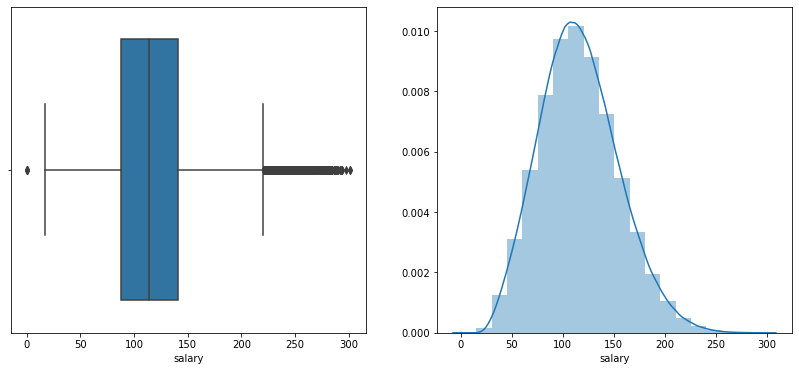

In [11]:
#Visualize target variable data 
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(merged_train_data.salary)
plt.subplot(1,2,2)
sns.distplot(merged_train_data.salary, bins=20)
plt.show()

2.3.3 Checking for potential outliers using the IQR rule

In [12]:
# Identify potential outliers
info = merged_train_data.salary.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


2.3.4 Investigate identified outliers

In [13]:
#checking lower bound suspected outliers 
merged_train_data[merged_train_data.salary < 8.5].count()

jobId                  5
companyId              5
jobType                5
degree                 5
major                  5
industry               5
yearsExperience        5
milesFromMetropolis    5
salary                 5
dtype: int64

In [14]:
#checking lower bound suspected outliers 
merged_train_data[merged_train_data.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Findings: All these are invalid data considering the various jobtypes are more likely not to be volunteers. Hence the data needs to be dropped.

In [15]:
#dropping invalid salary values and confirm data dropped.
merged_train_data.drop(merged_train_data[merged_train_data.salary <8.5].index, inplace=True)
merged_train_data.shape

(999995, 9)

In [16]:
#checking upper bound suspected outliers 
merged_train_data.loc[merged_train_data.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

Findings: Asides the Junior roles, all the other job types are senior level hence expected to be high earners. Inspect the Junior type roles to confirm.

In [17]:
#checking upper bound most suspicious potential outliers
merged_train_data[(merged_train_data.salary > 220.5) & (merged_train_data.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Findings: The Junior job types are for individuals with high degrees, high years of experience and industries with typical high compesation rates. Hence they will be retained in the data.

### 2.4 EDA - Data Exploration

2.4.1 Summary of Feature and Target Variables

In [18]:
#summarize numerical variables
merged_train_data.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [19]:
#summarize categorical variables
merged_train_data.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685337308,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


2.4.2 Review correlation between each feature and the target

In [20]:
plot_feature(merged_train_data, 'companyId')

NameError: name 'plt' is not defined

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data